In [ ]:
import os
import os.path
import datetime
from pathlib import Path

import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs

In [98]:
def plot_obj_lens2_hr_p3(Lat_lens2, Lon_lens2, data1, data2):
    '''
     
    '''
    
    proj = ccrs.Robinson(central_longitude=180) #ccrs.PlateCarree(central_longitude=180)
    
    Lon_lens2[Lon_lens2<0]=Lon_lens2[Lon_lens2<0]+360
    Lon_hr[Lon_hr<0]=Lon_hr[Lon_hr<0]+360
    
    level_s = np.arange(0, 20, 2)
    fig, ax = plt.subplots(1, 3, subplot_kw={'projection': proj}, figsize=(12, 4), dpi=300)
    im=ax[0].contourf(Lon_lens2, Lat_lens2, data1, transform=ccrs.PlateCarree(),
                        extend='both', cmap='RdYlBu_r', levels=level_s)
    fig.colorbar(im, ax=ax[0], shrink=0.9, location="bottom")
    ax[0].coastlines() 
    ax[0].add_feature(cartopy.feature.BORDERS, linestyle='--')
        
    ax[0].set_title('Current', wrap=True) # fontweight='bold')#, color= 'blue')
    xl = ax[0].gridlines(draw_labels=True)  
        
    im=ax[1].contourf(Lon_hr, Lat_hr, data2, transform=ccrs.PlateCarree(), 
                        extend='both', cmap='RdYlBu_r', levels=level_s)
        
    fig.colorbar(im, ax=ax[1], shrink=0.9, location="bottom")
    ax[1].coastlines()
    ax[1].add_feature(cartopy.feature.BORDERS, linestyle='--') 
        
    ax[1].set_title('Future', wrap=True) # fontweight='bold')#, color= 'blue')
    xl = ax[1].gridlines(draw_labels=True)  
              
    im=ax[2].contourf(Lon_hr, Lat_hr, data2-data1, transform=ccrs.PlateCarree(), 
                        extend='both', cmap='RdYlBu_r', levels=np.arange(-2, 2.2, 0.2))
        
    fig.colorbar(im, ax=ax[2], shrink=0.9, location="bottom")
    ax[2].coastlines()
    ax[2].add_feature(cartopy.feature.BORDERS, linestyle='--') 
        
    ax[2].set_title('Future-Current', wrap=True) # fontweight='bold')#, color= 'blue')
    xl = ax[2].gridlines(draw_labels=True)  
                      
    fig.suptitle('Annual average wind speed Obj', fontsize=14)        
    #plt.savefig('PDF/' + Objects[obj] + '_' + type_s + '_' + res + '.pdf')  
    plt.tight_layout()
    plt.show()

In [ ]:
%%time
spd_o = 'SPD_Objects'
dir_o = '/glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/annual_feature_frequ/'

is_current = False

if is_current == True:
    year_s = 2000
    year_e = 2020
    flnm_o = dir_o + 'spd_obj_c.npy'
else:
    year_s = 2070
    year_e = 2100
    flnm_o = dir_o + 'spd_obj_f.npy'

if os.path.exists(flnm_o):
    print(flnm_o)
    spd_obj_c = np.load(flnm_o)
    #plt.pcolormesh(range(spd_obj_c.shape[1]), range(spd_obj_c.shape[0]), spd_obj_c)
else:
    Years = np.arange(year_s, year_e + 1)

    n_mem = 9
    is_first = True
    nn = 0
    for mem in np.arange(2, n_mem+1):
        mem_s = str(mem).zfill(3)
        dir_hr  = '/glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/' + mem_s + '/'
        print(mem_s)
        for year in Years:
            YYYY = str(year)
            if mem_s == '003':
                flnm = dir_hr + YYYY + '01_03_ObjectMasks__dt-6h_MOAAP-masks.nc'
            elif mem_s == '002':
                flnm = dir_hr + YYYY + '01_02_ObjectMasks__dt-6h_MOAAP-masks.nc'
            else:
                flnm = dir_hr + YYYY + '01_' + mem_s + '_ObjectMasks__dt-6h_MOAAP-masks.nc'

            print('Reading: ' + flnm)
        
            ncid = Dataset(flnm, mode='r')
            # convert instances of 'netCDF4._netCDF4.Variable' to numpy array by using[:]
            spd_obj_tmp = np.mean(ncid.variables[spd_o][:]> 0,  axis=0)

            #with xr.open_dataset(flnm) as ds:
            #    spd_obj_tmp = ds[spd_o].mean(dim='time')
                
            if is_first == True:
                spd_obj = spd_obj_tmp.copy()
                is_first = False
            else:
                spd_obj = spd_obj + spd_obj_tmp

            nn = nn + 1
    spd_obj_c = spd_obj/nn

    # npy and npz files preserve information such as data type (dtype) and shape.
    np.save(flnm_o, spd_obj_c.data ) 


In [87]:
flnm_c = dir_o + 'spd_obj_c.npy'
flnm_f = dir_o + 'spd_obj_f.npy'
spd_obj_c = np.load(flnm_c)*365
spd_obj_f = np.load(flnm_f)*365

dir_hr  = '/glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/005/'
flnm_hr = dir_hr + '196001_005_ObjectMasks__dt-6h_MOAAP-masks.nc'
ncid = Dataset(flnm_hr)
Lat_hr = np.squeeze(ncid.variables['lat'][:])
Lon_hr = np.squeeze(ncid.variables['lon'][:])
nx_hr = Lon_hr.shape[0]
ny_hr = Lon_hr.shape[1]
ncid.close()
print('HR grid is ', flnm_hr, nx_hr, ny_hr)

HR grid is  /glade/campaign/mmm/c3we/mingge/LENS2/HR/MOAAP/005/196001_005_ObjectMasks__dt-6h_MOAAP-masks.nc 720 1440


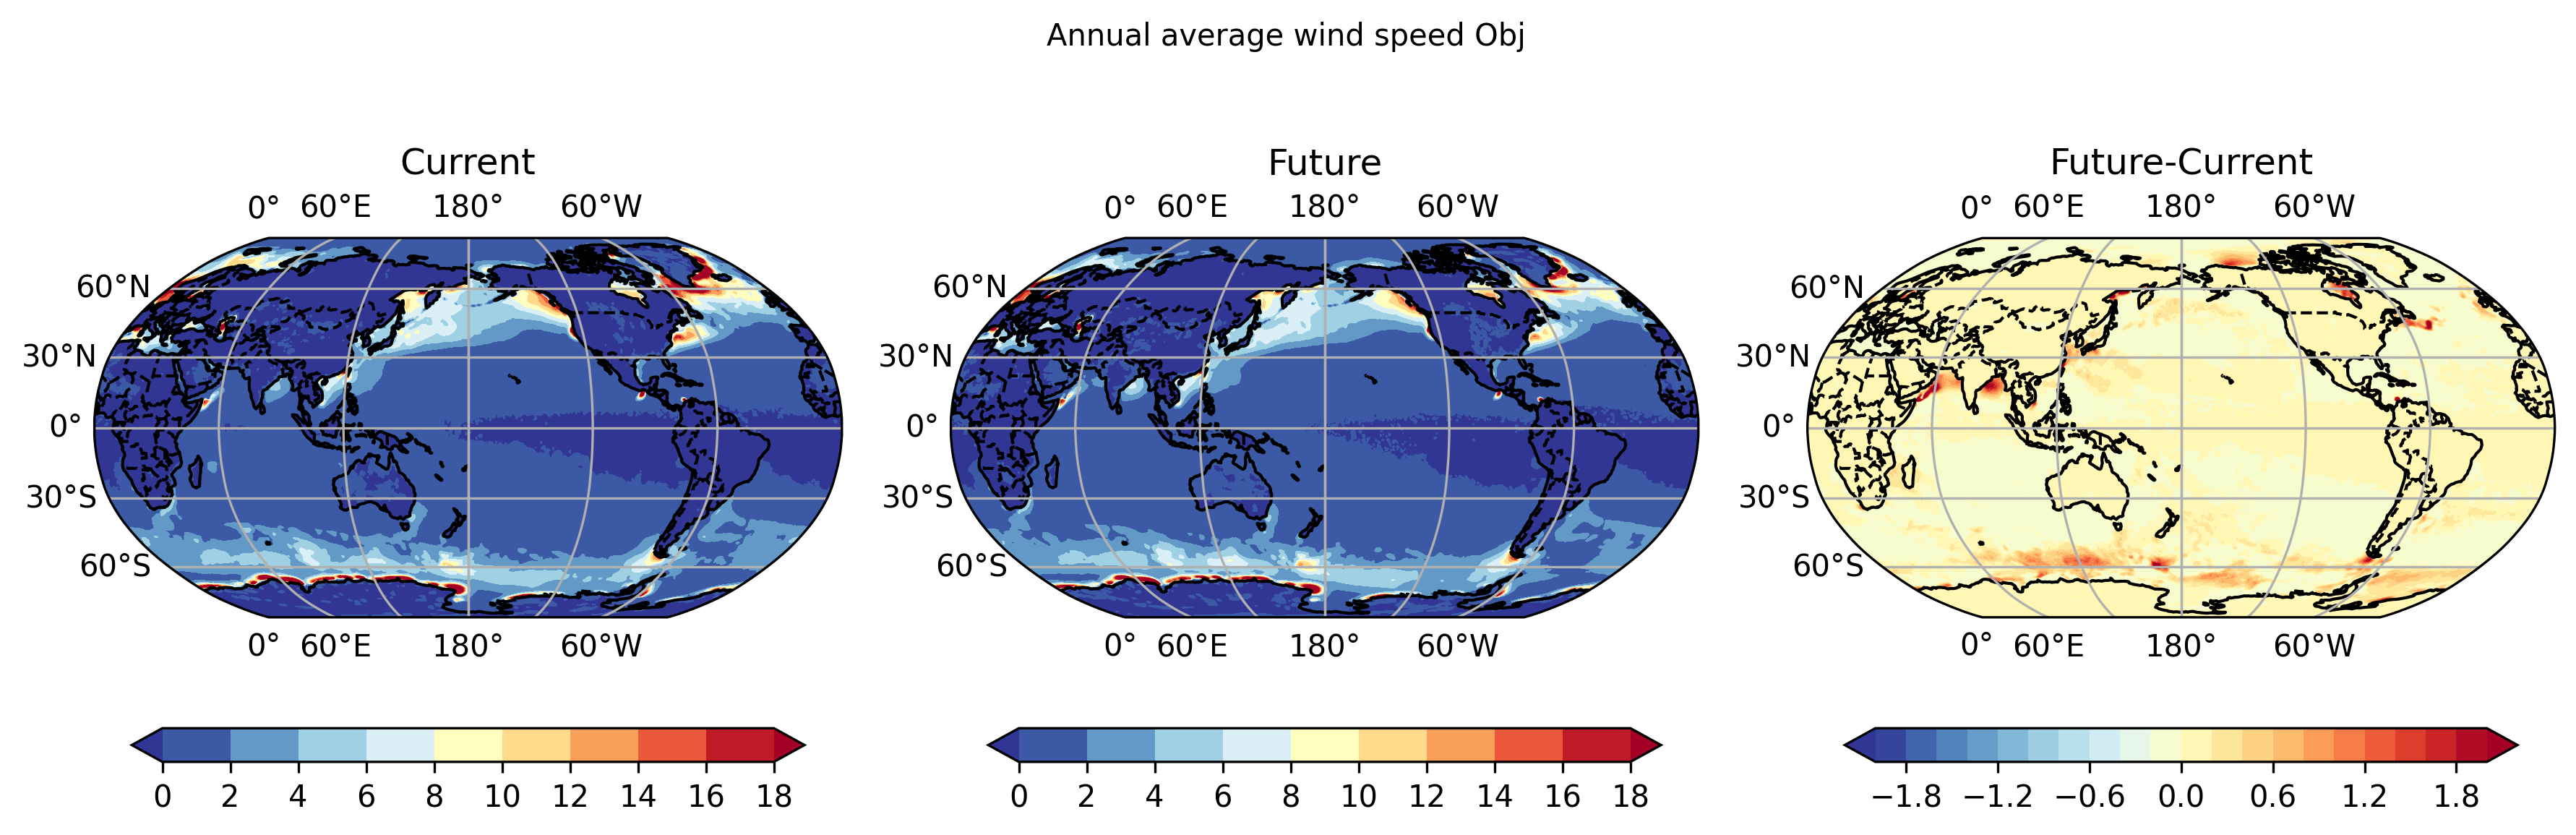

In [97]:
plot_obj_lens2_hr_p3(Lat_hr, Lon_hr, spd_obj_c, spd_obj_f) 
